In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('laptop_prices.csv')
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [ ]:
# The task is to build a machine learning model that can predict the price of laptops based on their features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
euro_to_inr = 97
df["Price_INR"] = df['Price_euros'] * euro_to_inr

In [ ]:
df.drop("Price_euros", axis=1, inplace=True)
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_INR
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,129949.93
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,Standard,1440,900,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,87197.18
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,55775.00
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,Standard,2880,1800,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,246132.65
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,174949.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,Full HD,1920,1080,...,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520,61886.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,Quad HD+,3200,1800,...,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520,145403.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,Standard,1366,768,...,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics,22213.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,Standard,1366,768,...,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330,74108.00


In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Screen,0
ScreenW,0
ScreenH,0


In [ ]:
df.describe()

,Inches,Ram,Weight,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Price_INR
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1900.043922,1073.904314,2.302980,444.517647,176.069020,110091.998706
std,1.429470,5.097809,0.669196,493.346186,283.883940,0.503846,365.537726,415.960655,67972.992905
min,10.100000,2.000000,0.690000,1366.000000,768.000000,0.900000,8.000000,0.000000,16878.000000
25%,14.000000,4.000000,1.500000,1920.000000,1080.000000,2.000000,256.000000,0.000000,59073.000000
50%,15.600000,8.000000,2.040000,1920.000000,1080.000000,2.500000,256.000000,0.000000,95933.000000
75%,15.600000,8.000000,2.310000,1920.000000,1080.000000,2.700000,512.000000,0.000000,145160.500000
max,18.400000,64.000000,4.700000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000,591603.000000


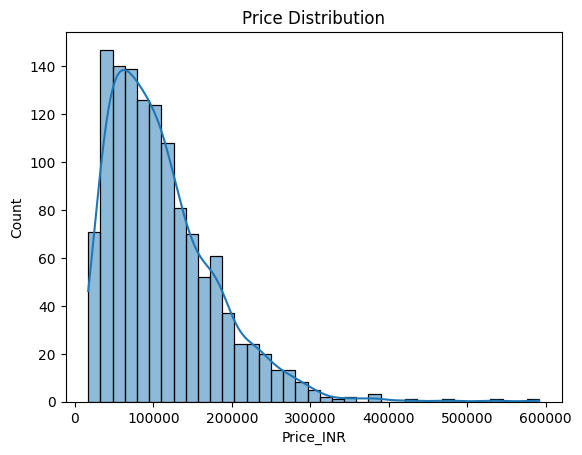

In [ ]:
# distribution of target variable
sns.histplot(df['Price_INR'], kde=True)
plt.title('Price Distribution')
plt.show()

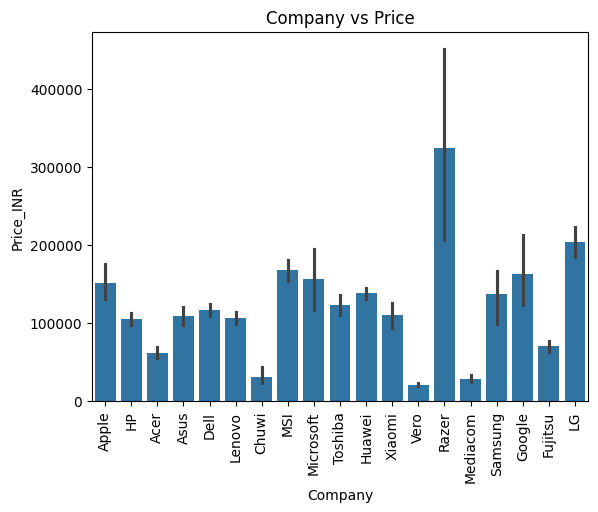

In [ ]:
sns.barplot(x='Company', y='Price_INR', data=df)
plt.xticks(rotation=90)
plt.title('Company vs Price')
plt.show()

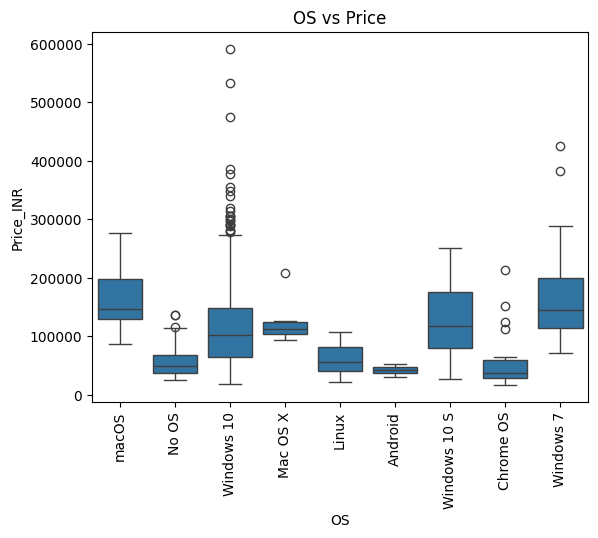

In [ ]:
sns.boxplot(x='OS', y='Price_INR', data=df)
plt.xticks(rotation=90)
plt.title('OS vs Price')
plt.show()

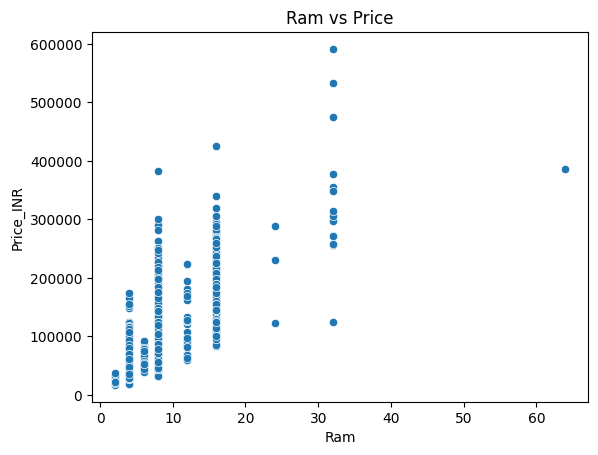

In [ ]:
sns.scatterplot(x='Ram', y='Price_INR', data=df)
plt.title('Ram vs Price')
plt.show()

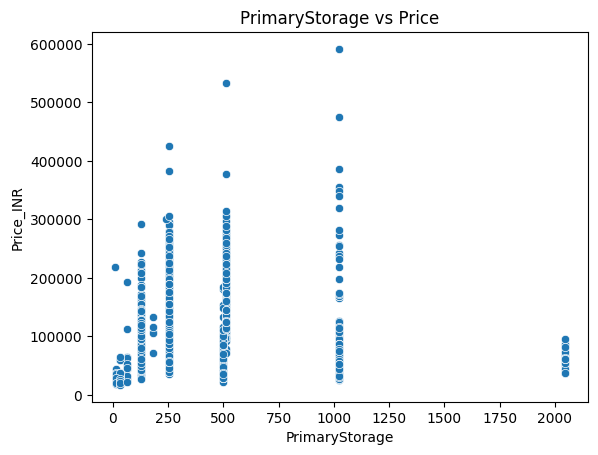

In [ ]:
sns.scatterplot(x='PrimaryStorage', y='Price_INR', data=df)
plt.title('PrimaryStorage vs Price')
plt.show()

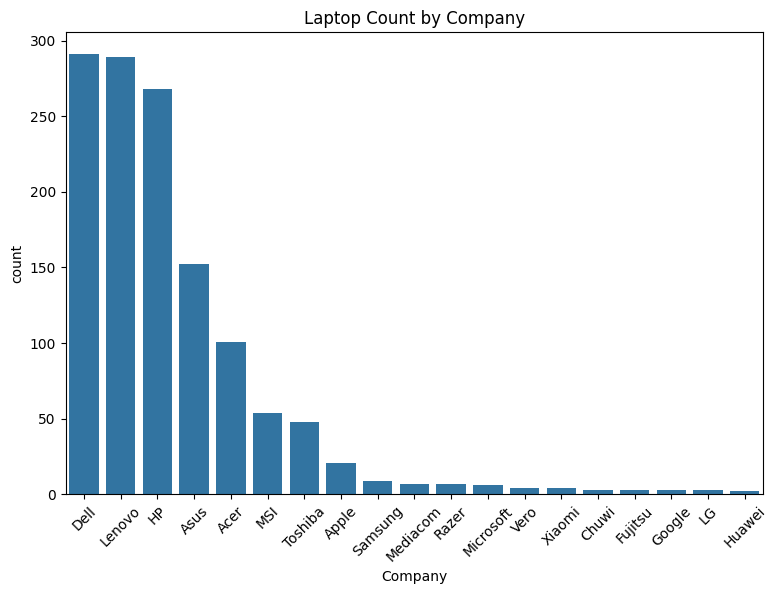

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Laptop Count by Company')
plt.show()

# we can see the top 3 most commom companies are Dell, Lenovo and HP.

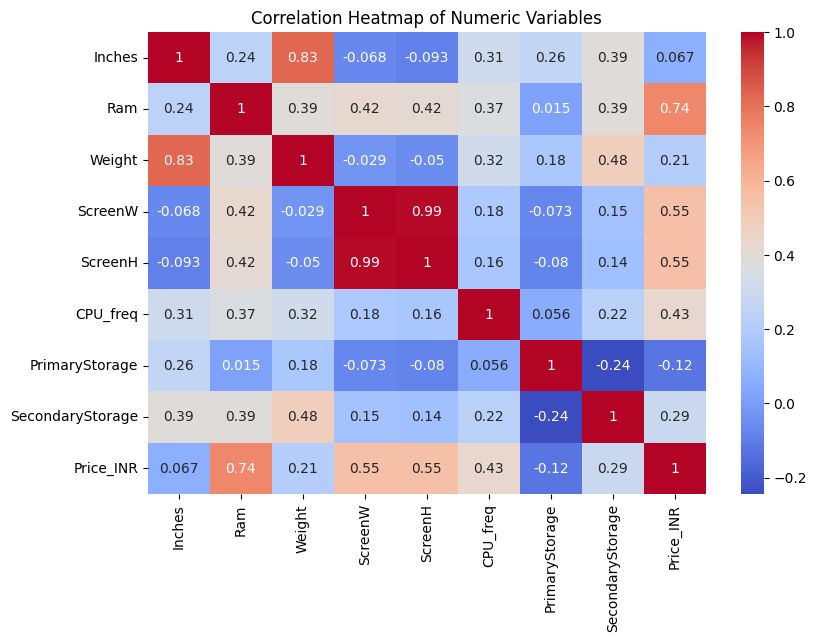

In [ ]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm" )
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [ ]:
# data preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['OS'] = le.fit_transform(df['OS'])
df['Screen'] = le.fit_transform(df['Screen'])
df['Touchscreen'] = le.fit_transform(df['Touchscreen'])
df['IPSpanel'] = le.fit_transform(df['IPSpanel'])
df['RetinaDisplay'] = le.fit_transform(df['RetinaDisplay'])
df['CPU_company'] = le.fit_transform(df['CPU_company'])
df['GPU_company'] = le.fit_transform(df['GPU_company'])
df['PrimaryStorageType'] = le.fit_transform(df['PrimaryStorageType'])
df['SecondaryStorageType'] = le.fit_transform(df['SecondaryStorageType'])

In [ ]:
df = pd.get_dummies(df, columns=['Company','Product', 'TypeName', 'CPU_model', 'GPU_model'], drop_first=True)

In [ ]:
df.head()

,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,8,1.37,3,2560,1600,0,1,1,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,8,1.34,3,1440,900,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,4,1.86,1,1920,1080,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,8,1.83,3,2880,1800,0,1,1,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,8,1.37,3,2560,1600,0,1,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop('Price_INR', axis=1)
y = df['Price_INR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 1838987069.055487
R2 Score: 0.606217360991342


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


MSE: 632648468.7980626
R2 Score: 0.864530867127826


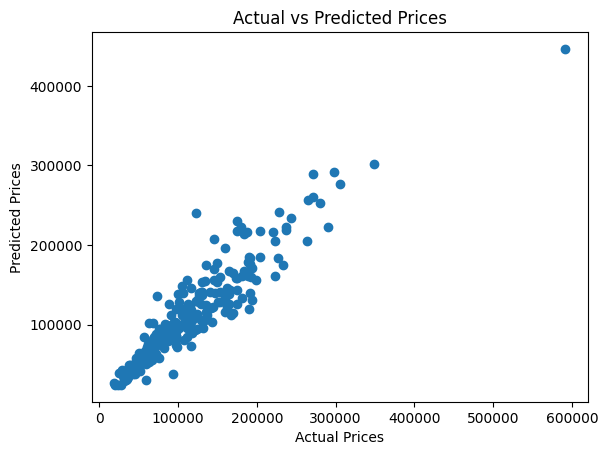

In [ ]:
# comparing predicted vs actual prices
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
# feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

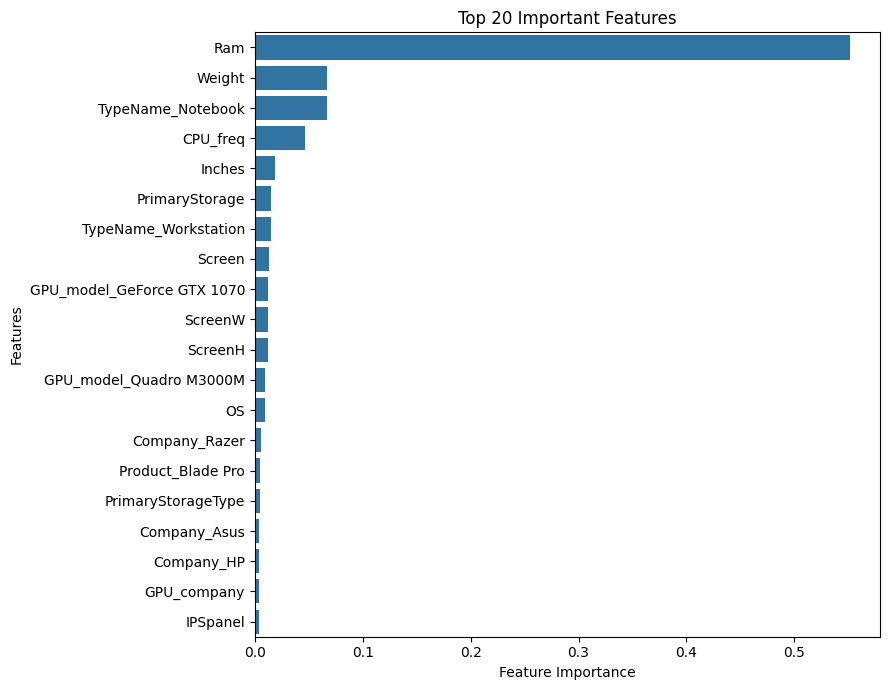

In [ ]:
# plotting feature importance for top 20 features
n = 20
top_features = feature_importance.head(n)

plt.figure(figsize=(9, 7))
sns.barplot(x=top_features, y=top_features.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(f'Top {n} Important Features')
plt.tight_layout()
plt.show()


# **Project Summary**



**Objective:**


Develop a machine learning model to predict laptop prices based on specifications.

Help consumers/retailers estimate value using hardware and design features.



**Data Collection & Preprocessing:**


Dataset: Included features like brand, RAM, storage, CPU/GPU, screen specs, OS, etc.

Steps Taken:

Handled missing values

Encoded categorical variables

Combined related features



**Exploratory Data Analysis (EDA):**


Visualized feature vs. price relationships (RAM, Storage, GPU, Company)

Analyzed distributions and outliers

Identified influential features



**Model Building & Evaluation:**

*Models Used:*

Linear Regression

MSE: ~1.84 billion

R² Score: ~0.61


Random Forest Regressor

MSE: ~632 million

R² Score: ~0.86

Captured complex, non-linear relationships



**Top 5 Influential Features:**


RAM

Weight

CPU Frequency

Laptop Type

Primary Storage



**Conclusion:**


Random Forest performed best and is suited for real-world pricing.

Key specs like RAM and storage significantly drive laptop value.

This model can assist in price estimation tools for retailers or e-commerce platforms.



In [ ]:
import joblib
joblib.dump(rf, 'laptop_price_prediction_model.pkl')       # saving the rf model

['laptop_price_prediction_model.pkl']